# Bitwise operations

In [173]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

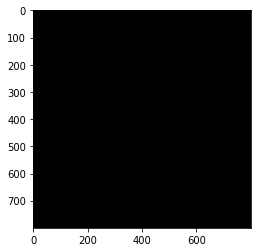

In [174]:
# With numpy create a black canvas of size 800 x 800 

canvas = np.zeros((800, 800), np.uint8)
plt.imshow(canvas, cmap='gray')

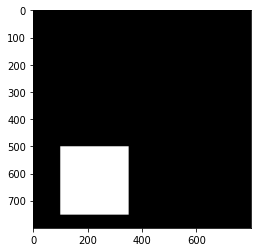

In [175]:
# Make a copy of the canvas and draw a white square of size 250 x 250 on top of the copy of the canvas

square = canvas.copy()
cv2.rectangle(square, (100, 500), (350,750), 255, -1)
plt.imshow(square, cmap='gray')

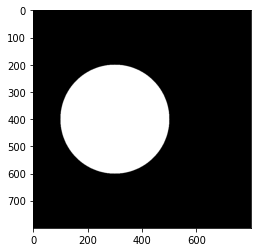

In [176]:
# Make a copy of the origina lcanvas and draw a white circle of size 200 x 200 on top of the copy of the canvas
# Make sure the circle is in a different position of the canvas than the square

circle = canvas.copy()
cv2.circle(circle,(300,400), 200, 255, -1)
plt.imshow(circle, cmap='gray')

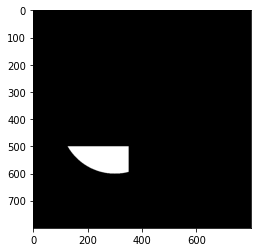

In [177]:
# Create a new image and merge both previous images (square and circle) with a bitwise and operation

sqr_and_circle = cv2.bitwise_and(square, circle)
plt.imshow(img_sqr_circle, cmap='gray')

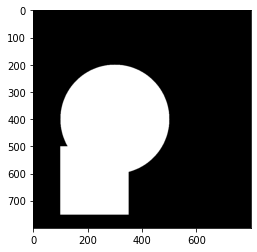

In [178]:
# Create a new image and merge both previous images (square and circle) with a bitwise or operation

sqr_or_circle = cv2.bitwise_or(square, circle)
plt.imshow(sqr_or_circle, cmap='gray')

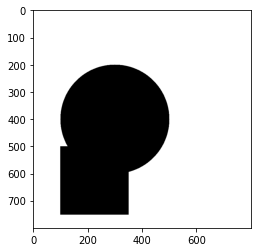

In [179]:
# Create a new image and merge both previous images (square and circle) with a bitwise not operation

sqr_not_circle = cv2.bitwise_not(sqr_or_circle)
plt.imshow(sqr_not_circle, cmap='gray')

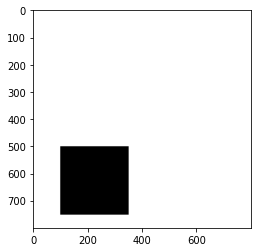

In [180]:
circle_not_square = cv2.bitwise_not(square, circle)
plt.imshow(circle_not_square, cmap='gray')

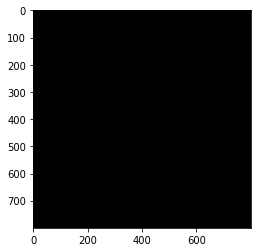

In [181]:
# Create a new image and merge both previous images (square and circle) with a bitwise xor operation

sqr_xor_circle = cv2.bitwise_xor(square, circle)
plt.imshow(sqr_xor_circle, cmap='gray')

In [182]:
def imgshow(img):
    plt.figure(figsize=(20,20))
    plt.imshow((img[:,:,::-1]))

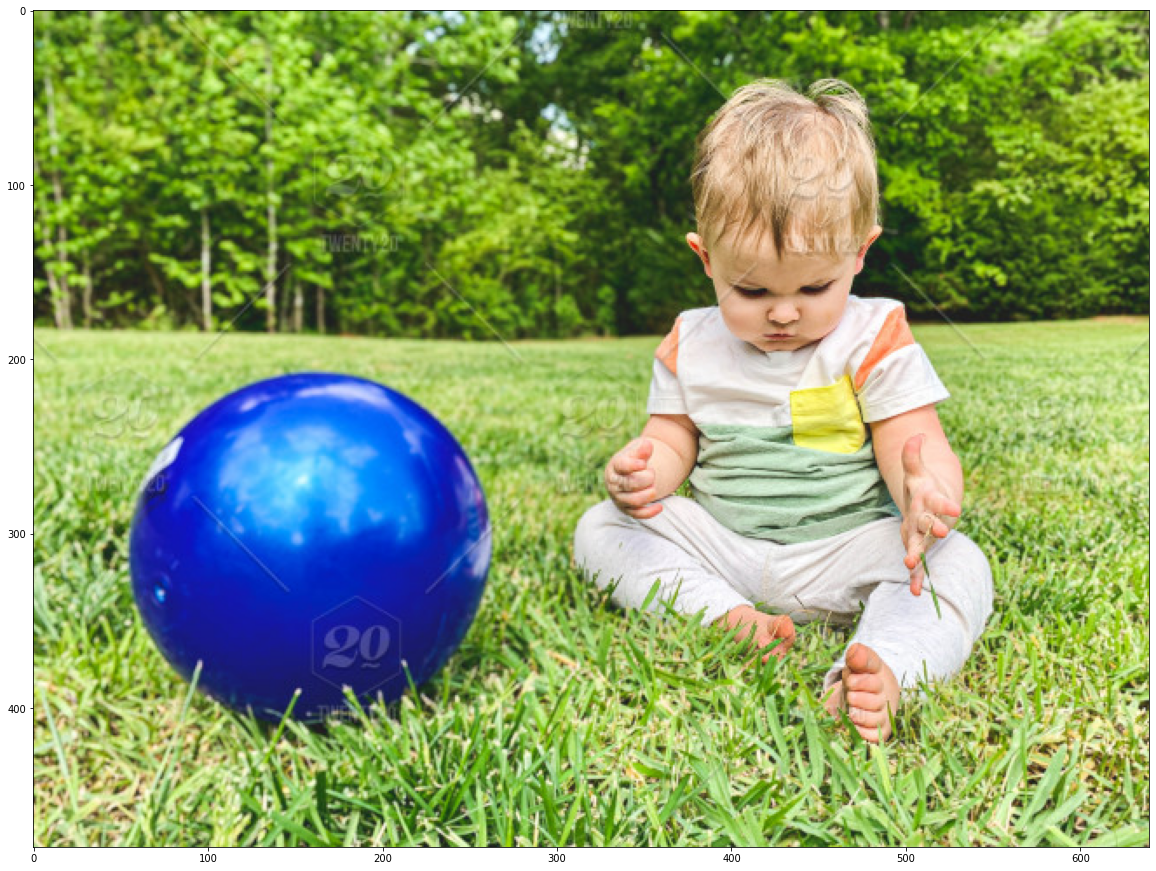

In [183]:
# Load a color image and convert it to HSV
# Identify a prominent color from the image and filter it out
# Create a mask for that color and apply a bitwise and specifying the mask to show only this part of the image

boy = cv2.imread('./img/boy_ball.jpg')
boy_hsv = cv2.cvtColor(boy, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(boy_hsv)

imgshow(boy)

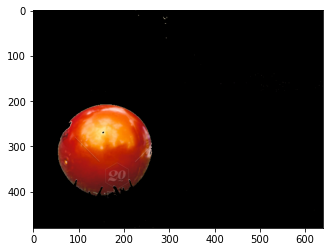

In [184]:
low_range = (95, 50, 20)
upp_range = (160, 350, 255)
ball_mask = cv2.inRange(boy_hsv, low_range, upp_range)
masked_boy = boy.copy()
masked_boy[ball_mask == 0] = [0, 0, 0]
plt.imshow(masked_boy)

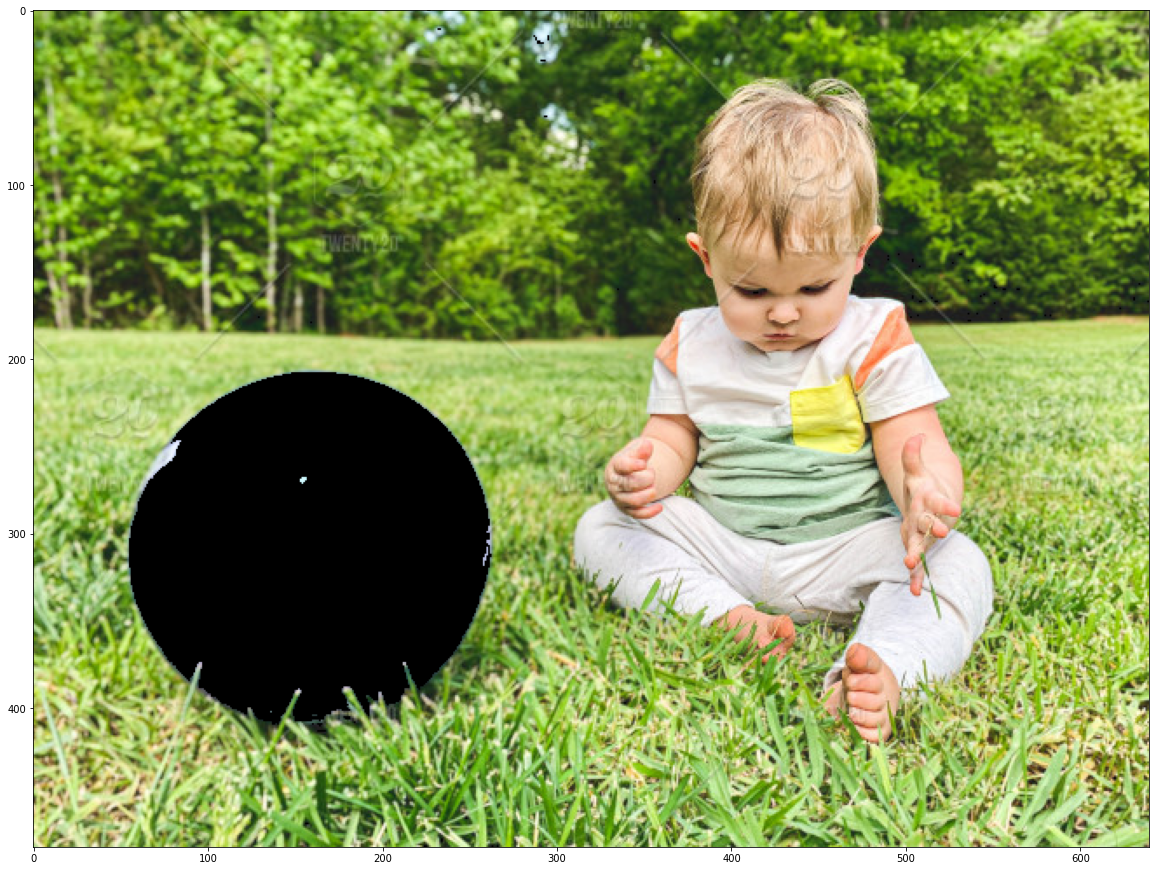

In [185]:
# With the same image and mask you have created above now apply a bitwise not specifying the mask 
# to show everything but the color you masked out before

boy_no_ball = cv2.bitwise_xor(boy, masked_boy)

imgshow(boy_no_ball)

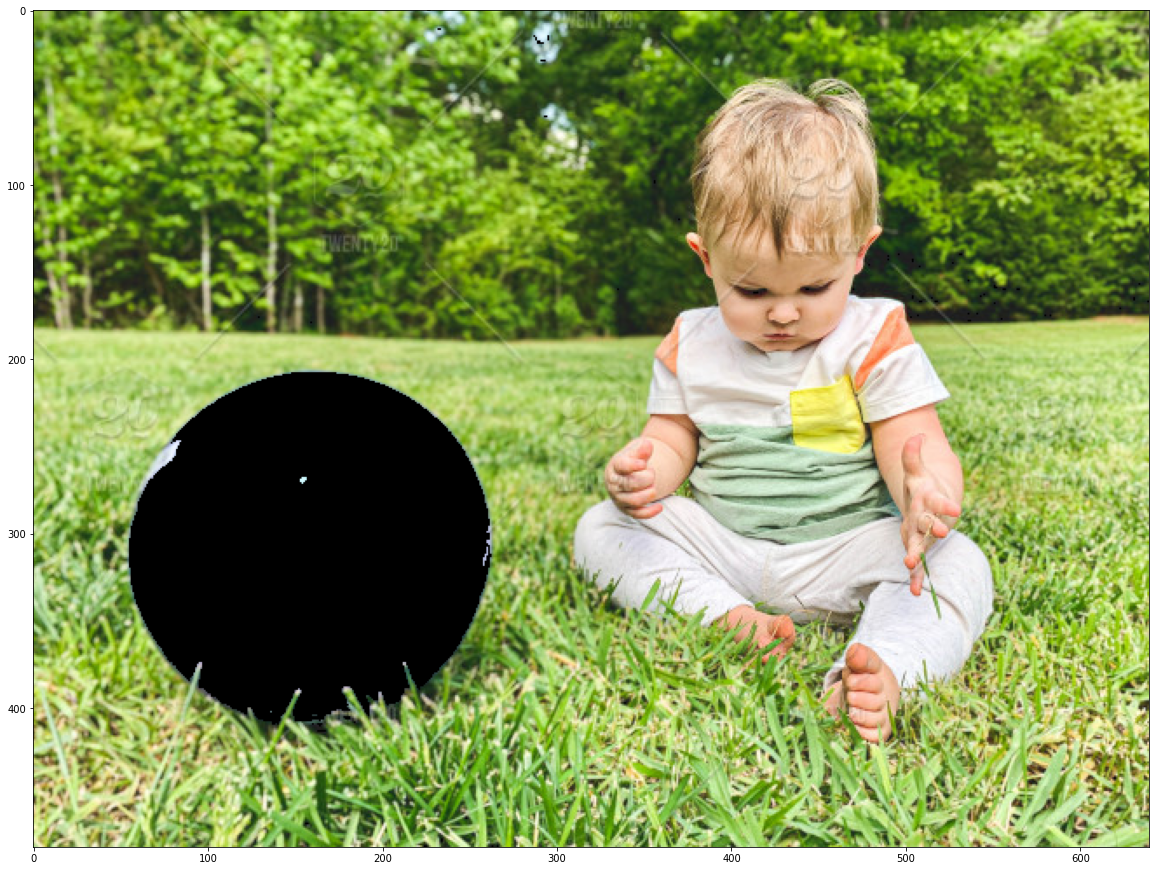

In [187]:
mask1 = cv2.bitwise_not(ball_mask)
bitwand = cv2.bitwise_and(boy, boy, mask=mask1)
imgshow(bitwand)